## Dataset: [Face Mask Detection](https://www.kaggle.com/andrewmvd/face-mask-detection)

## Repro [YOLOv5](https://github.com/ultralytics/yolov5)

In [1]:
!git clone https://github.com/rkuo2000/yolov5
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 3390, done.
remote: Total 3390 (delta 0), reused 0 (delta 0), pack-reused 3390
Receiving objects: 100% (3390/3390), 7.02 MiB | 12.39 MiB/s, done.
Resolving deltas: 100% (2273/2273), done.
/kaggle/working/yolov5


In [2]:
!mkdir -p Dataset/FaceMask/Images
!mkdir -p Dataset/FaceMask/Labels

In [3]:
# copy image files
!cp -rf /kaggle/input/face-mask-detection/images/* Dataset/FaceMask/Images

In [4]:
!mkdir -p Dataset/images Dataset/labels

## Create Dataset

In [5]:
import os
import numpy as np
from pathlib import Path
from xml.dom.minidom import parse
from shutil import copyfile

In [6]:
FILE_ROOT = "/kaggle/input/face-mask-detection/"
IMAGE_PATH = FILE_ROOT + "images"  
ANNOTATIONS_PATH = FILE_ROOT + "annotations"

DATA_ROOT = "Dataset/"
LABELS_ROOT = DATA_ROOT + "FaceMask/Labels"
IMAGES_ROOT = DATA_ROOT + "FaceMask/Images"  

DEST_IMAGES_PATH = "images"
DEST_LABELS_PATH = "labels" 

In [7]:
classes = ['with_mask', 'without_mask', 'mask_weared_incorrect']

### convert annotations (from COCO .xml to YOLO format .txt)

In [8]:
def cord_converter(size, box):
    """
    convert xml annotation to darknet format coordinates
    :param size： [w,h]
    :param box: anchor box coordinates [upper-left x,uppler-left y,lower-right x, lower-right y]
    :return: converted [x,y,w,h]
    """
    x1 = int(box[0])
    y1 = int(box[1])
    x2 = int(box[2])
    y2 = int(box[3])

    dw = np.float32(1. / int(size[0]))
    dh = np.float32(1. / int(size[1]))

    w = x2 - x1
    h = y2 - y1
    x = x1 + (w / 2)
    y = y1 + (h / 2)

    x = x * dw
    w = w * dw
    y = y * dh
    h = h * dh
    return [x, y, w, h]

def save_file(img_jpg_file_name, size, img_box):
    save_file_name = LABELS_ROOT + '/' + img_jpg_file_name + '.txt'
    print(save_file_name)
    file_path = open(save_file_name, "a+")
    for box in img_box:

        cls_num = classes.index(box[0])

        new_box = cord_converter(size, box[1:])

        file_path.write(f"{cls_num} {new_box[0]} {new_box[1]} {new_box[2]} {new_box[3]}\n")

    file_path.flush()
    file_path.close()
    
def get_xml_data(file_path, img_xml_file):
    img_path = file_path + '/' + img_xml_file + '.xml'
    print(img_path)

    dom = parse(img_path)
    root = dom.documentElement
    img_name = root.getElementsByTagName("filename")[0].childNodes[0].data
    img_size = root.getElementsByTagName("size")[0]
    objects = root.getElementsByTagName("object")
    img_w = img_size.getElementsByTagName("width")[0].childNodes[0].data
    img_h = img_size.getElementsByTagName("height")[0].childNodes[0].data
    img_c = img_size.getElementsByTagName("depth")[0].childNodes[0].data
    # print("img_name:", img_name)
    # print("image_info:(w,h,c)", img_w, img_h, img_c)
    img_box = []
    for box in objects:
        cls_name = box.getElementsByTagName("name")[0].childNodes[0].data
        x1 = int(box.getElementsByTagName("xmin")[0].childNodes[0].data)
        y1 = int(box.getElementsByTagName("ymin")[0].childNodes[0].data)
        x2 = int(box.getElementsByTagName("xmax")[0].childNodes[0].data)
        y2 = int(box.getElementsByTagName("ymax")[0].childNodes[0].data)
        # print("box:(c,xmin,ymin,xmax,ymax)", cls_name, x1, y1, x2, y2)
        img_jpg_file_name = img_xml_file + '.jpg'
        img_box.append([cls_name, x1, y1, x2, y2])
    # print(img_box)

    # test_dataset_box_feature(img_jpg_file_name, img_box)
    save_file(img_xml_file, [img_w, img_h], img_box)

In [9]:
files = os.listdir(ANNOTATIONS_PATH)
for file in files:
    print("file name: ", file)
    file_xml = file.split(".")
    get_xml_data(ANNOTATIONS_PATH, file_xml[0])

file name:  maksssksksss737.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss737.xml
Dataset/FaceMask/Labels/maksssksksss737.txt
file name:  maksssksksss410.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss410.xml
Dataset/FaceMask/Labels/maksssksksss410.txt
file name:  maksssksksss537.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss537.xml
Dataset/FaceMask/Labels/maksssksksss537.txt
file name:  maksssksksss295.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss295.xml
Dataset/FaceMask/Labels/maksssksksss295.txt
file name:  maksssksksss771.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss771.xml
Dataset/FaceMask/Labels/maksssksksss771.txt
file name:  maksssksksss234.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss234.xml
Dataset/FaceMask/Labels/maksssksksss234.txt
file name:  maksssksksss620.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss620.xml
Dataset/FaceMask/Labels/maksssksksss620.txt
file n

## split Images dataset

In [10]:
from sklearn.model_selection import train_test_split
image_list = os.listdir('Dataset/FaceMask/Images')
train_list, test_list = train_test_split(image_list, test_size=0.2, random_state=7)
val_list, test_list = train_test_split(test_list, test_size=0.5, random_state=8)

print('total =',len(image_list))
print('train :',len(train_list))
print('val   :',len(val_list))
print('test  :',len(test_list))

total = 853
train : 682
val   : 85
test  : 86


In [11]:
def copy_data(file_list, img_labels_root, imgs_source, type):

    root_file = Path(DATA_ROOT + DEST_IMAGES_PATH + '/' + type)
    if not root_file.exists():
        print(f"Path {root_file} is not exit")
        os.makedirs(root_file)

    root_file = Path(DATA_ROOT + DEST_LABELS_PATH + '/' + type)
    if not root_file.exists():
        print(f"Path {root_file} is not exit")
        os.makedirs(root_file)

    for file in file_list:
        img_name = file.replace('.png', '')
        img_src_file = imgs_source + '/' + img_name + '.png'
        label_src_file = img_labels_root + '/' + img_name + '.txt'

        # print(img_sor_file)
        # print(label_sor_file)
        # im = Image.open(rf"{img_sor_file}")
        # im.show()

        # Copy image
        DICT_DIR = DATA_ROOT + DEST_IMAGES_PATH + '/' + type
        img_dict_file = DICT_DIR + '/' + img_name + '.png'

        copyfile(img_src_file, img_dict_file)

        # Copy label
        DICT_DIR = DATA_ROOT + DEST_LABELS_PATH + '/' + type
        img_dict_file = DICT_DIR + '/' + img_name + '.txt'
        copyfile(label_src_file, img_dict_file)

In [12]:
copy_data(train_list, LABELS_ROOT, IMAGES_ROOT, "train")
copy_data(val_list,   LABELS_ROOT, IMAGES_ROOT, "val")
copy_data(test_list,  LABELS_ROOT, IMAGES_ROOT, "test")

Path Dataset/images/train is not exit
Path Dataset/labels/train is not exit
Path Dataset/images/val is not exit
Path Dataset/labels/val is not exit
Path Dataset/images/test is not exit
Path Dataset/labels/test is not exit


## Create data/facemask.yaml

In [13]:
!echo "train: Dataset/images/train" > data/facemask.yaml
!echo "val:   Dataset/images/val" >> data/facemask.yaml
!echo "nc : 3" >> data/facemask.yaml
!echo "names: ['With_Mask', 'Without_Mask', 'Incorrect_Mask']" >> data/facemask.yaml

!cat data/facemask.yaml

train: Dataset/images/train
val:   Dataset/images/val
nc : 3
names: ['With_Mask', 'Without_Mask', 'Incorrect_Mask']


## Train YOLOv5

In [14]:
!python train.py --img 320 --batch 16 --epochs 300 --data data/facemask.yaml --cfg models/yolov5s.yaml --weights yolov5s.pt

2021-05-29 08:52:08.557171: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.2
100%|██████████████████████████████████████| 14.5M/14.5M [00:00<00:00, 30.4MB/s]

Scanning 'Dataset/labels/train' for images and labels... 682 found, 0 missing, 0
Scanning 'Dataset/labels/train.cache' for images and labels... 682 found, 0 miss
Scanning 'Dataset/labels/val' for images and labels... 85 found, 0 missing, 0 em
Scanning 'Dataset/labels/val.cache' for images and labels... 85 found, 0 missing
Scanning 'Dataset/labels/val.cache' for images and labels... 85 found, 0 missing

Analyzing anchors... anchors/target = 4.30, Best Possible Recall (BPR) = 0.9967
Scanning 'Dataset/labels/val.cache' for images and labels... 85 found, 0 missing
     0/299    0.761G    0.1234    0.1062   0.03506    0.2647        83       320
               Class      Images     Targets           P           R      mAP@.5
                 all          85         37

In [15]:
# save trained weights for detection
!cp runs/train/exp/weights/best.pt weights

## Test YOLOv5

### detect facemask

In [16]:
!python detect.py --source Dataset/images/test --img-size 320 --conf 0.4 --weights weights/best.pt 

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=320, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='Dataset/images/test', update=False, view_img=False, weights=['weights/best.pt'])
Fusing layers... 
image 1/86 /kaggle/working/yolov5/Dataset/images/test/maksssksksss103.png: 256x320 4 With_Masks, Done. (0.012s)
image 2/86 /kaggle/working/yolov5/Dataset/images/test/maksssksksss105.png: 224x320 10 With_Masks, Done. (0.012s)
image 3/86 /kaggle/working/yolov5/Dataset/images/test/maksssksksss112.png: 320x224 1 Incorrect_Masks, Done. (0.012s)
image 4/86 /kaggle/working/yolov5/Dataset/images/test/maksssksksss116.png: 192x320 5 With_Masks, Done. (0.016s)
image 5/86 /kaggle/working/yolov5/Dataset/images/test/maksssksksss130.png: 320x288 1 With_Masks, 3 Without_Masks, 1 Incorrect_Masks, Done. (0.012s)
image 6/86 /kaggle/working/yolov5/Dataset/images/test/maksssksksss138.png: 224x320 4 With_M

In [17]:
# display detected images
from IPython.display import Image

<function matplotlib.pyplot.show(close=None, block=None)>

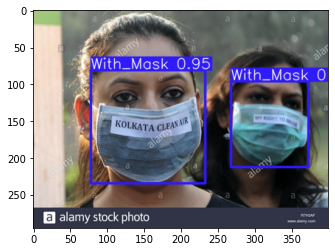

In [18]:
from glob import glob
import matplotlib.pyplot as plt
testfiles = glob('runs/detect/exp/*')

img = plt.imread(testfiles[0]) 
plt.imshow(img)    
plt.show

In [19]:
!python detect.py --source /kaggle/input/input-images/facemask.jpg --img-size 320 --conf 0.4 --weights weights/best.pt 

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=320, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='/kaggle/input/input-images/facemask.jpg', update=False, view_img=False, weights=['weights/best.pt'])
Fusing layers... 
image 1/1 /kaggle/input/input-images/facemask.jpg: 160x320 33 With_Masks, Done. (0.013s)
Results saved to runs/detect/exp2
Done. (0.080s)


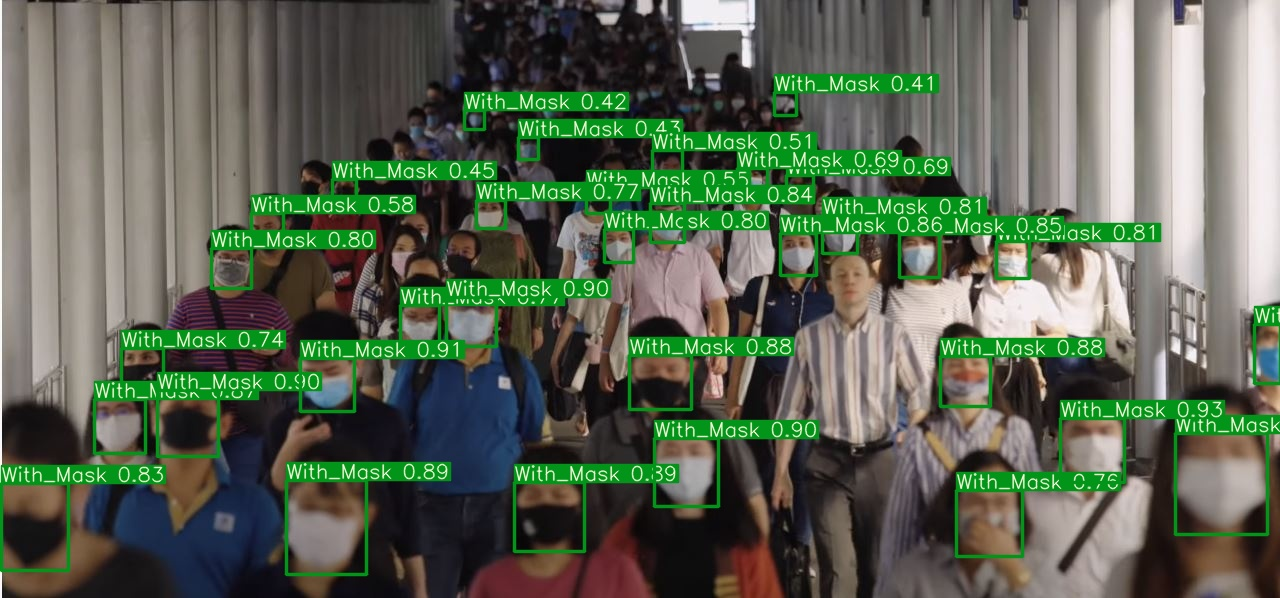

In [20]:
Image('runs/detect/exp2/facemask.jpg')

In [21]:
!python detect.py --source /kaggle/input/input-images/facemask1.jpg --img-size 320 --conf 0.4 --weights weights/best.pt 

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=320, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='/kaggle/input/input-images/facemask1.jpg', update=False, view_img=False, weights=['weights/best.pt'])
Fusing layers... 
image 1/1 /kaggle/input/input-images/facemask1.jpg: 160x320 1 With_Masks, 3 Without_Masks, Done. (0.013s)
Results saved to runs/detect/exp3
Done. (0.051s)


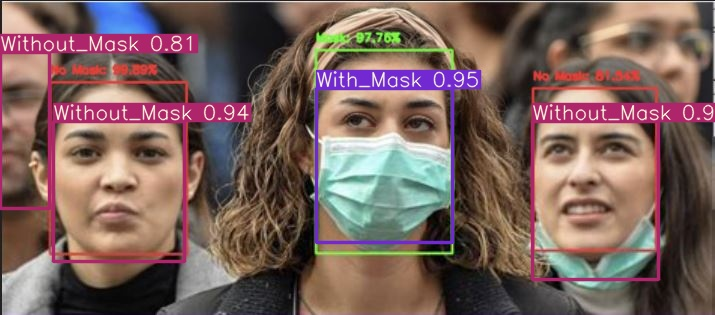

In [22]:
Image('runs/detect/exp3/facemask1.jpg')